# Reinforcement learning (RL)
## The goal
The goal of this exercise is to practice the key RL concepts.


### Task 1:

### Task 2: What is the expected (discounted) cumulative reward if starting from s1 and taking two actions in each episode? Assume policy:
$$ \pi (s_1) = a_1$$
$$ \pi (s_2) = a_2$$
$$ \pi (s_3) = a_1$$
The environment is given below. 

In [1]:
from ml4cps import automata
from ml4cps import control
from ml4cps import vis
ta = automata.Automaton(states=["s1", "s2", "s3"], transitions=[dict(source="s1", event="a1", dest="s2", p=0.8, r=10), 
                                                                 dict(source="s1", event="a1", dest="s3", p=0.2, r=5), 
                                                                 dict(source="s1", event="a2", dest="s3", p=1, r=7), 
                                                                 dict(source="s2", event="a1", dest="s3", p=0.9, r=0), 
                                                                 dict(source="s2", event="a2", dest="s1", p=1, r=20),
                                                                 dict(source="s2", event="a1", dest="s1", p=0.1, r=15),
                                                                 dict(source="s3", event="a1", dest="s2", p=0.3, r=8),
                                                                 dict(source="s3", event="a2", dest="s2", p=1, r=-5),
                                                                 dict(source="s3", event="a1", dest="s1", p=0.7, r=12)], initial_q="s1")
env = control.EnvironmentTA(ta)
vis.plot_cps_component(ta, output="notebook", color="hsu", node_labels=True, center_node_labels=True, show_transition_data=True, min_zoom=3, max_zoom=3)

In [5]:
print(env)

<EnvironmentTA instance>


In [6]:
from ml4cps.control import Agent

policy_dict = dict(s1="a1", s2="s2", s3="a1")
    
agent = Agent(policy=policy_dict, gamma=0.9)
agent.expected_cumulative_reward()


AttributeError: 'Agent' object has no attribute 'expected_cumulative_reward'

Episode 100/2000, Total Reward: -226.89026750067333
Episode 200/2000, Total Reward: -185.6704725507414
Episode 300/2000, Total Reward: -77.94379776318888
Episode 400/2000, Total Reward: -120.09493774581892
Episode 500/2000, Total Reward: -318.9599288141102
Episode 600/2000, Total Reward: -125.49526627005872
Episode 700/2000, Total Reward: -165.1434386322573
Episode 800/2000, Total Reward: -99.51901564942278
Episode 900/2000, Total Reward: -355.2974827229378
Episode 1000/2000, Total Reward: -205.64530095451312
Episode 1100/2000, Total Reward: -53.13682832554281
Episode 1200/2000, Total Reward: -114.27372741199986
Episode 1300/2000, Total Reward: -190.89016935091695
Episode 1400/2000, Total Reward: -56.3726853991678
Episode 1500/2000, Total Reward: -243.12188766628842
Episode 1600/2000, Total Reward: -84.35864602325053
Episode 1700/2000, Total Reward: -171.9507640120296
Episode 1800/2000, Total Reward: -134.270575370316
Episode 1900/2000, Total Reward: 66.88752605989585
Episode 2000/2000

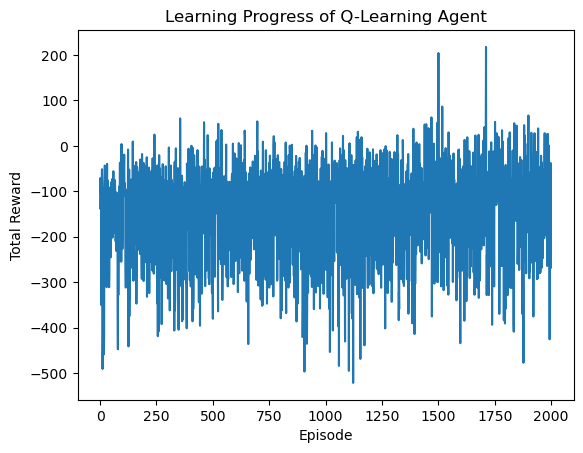

True
Total Reward of Trained Agent: -312.4176589465876


In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize the environment
env = gym.make("LunarLander-v3")  # v2 works for discrete actions

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.1  # Minimum exploration rate
epsilon_decay = 0.995  # Exploration decay rate
num_episodes = 2000  # Total episodes
max_steps = 500  # Maximum steps per episode
bins = 10  # Discretization bins for state space

# Discretize the state space
state_bins = [np.linspace(-1, 1, bins) for _ in range(8)]  # 8 state features


def discretize_state(state):
    """Discretize the continuous state into discrete bins."""
    state_idx = [np.digitize(s, state_bins[i]) - 1 for i, s in enumerate(state)]
    return tuple(state_idx)


# Initialize Q-table
q_table = np.zeros([bins] * 8 + [env.action_space.n])

# Q-learning algorithm
rewards = []
for episode in range(num_episodes):
    state = discretize_state(env.reset()[0])  # Reset environment
    total_reward = 0
    for step in range(max_steps):
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action and observe the next state and reward
        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        total_reward += reward

        delta = gamma * np.max(q_table[next_state]) - q_table[state][action]
        # Q-value update
        q_table[state][action] += alpha * (reward + delta)

        # Transition to the next state
        state = next_state

        if done:
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Store total reward for this episode
    rewards.append(total_reward)

    # Print progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

# Close environment
env.close()

# Visualization of learning progress
plt.plot(np.arange(num_episodes), rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Progress of Q-Learning Agent")
plt.show()

In [13]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# state = discretize_state(env.reset()[0])
done = False
total_reward = 0

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env.reset()

plt.ion()
fig, ax = plt.subplots(figsize=(8, 6))
while not done:
    action = np.argmax(q_table[state])  # Use the learned policy
    next_state, reward, done, _, _ = env.step(action)
    state = discretize_state(next_state)
    total_reward += reward
    
    frame = env.render()

    # Clear previous output and display the frame
    clear_output(wait=True)
    ax.imshow(frame)
    ax.axis('off')
    display(fig)
    plt.pause(0.1)

print(done)
print(f"Total Reward of Trained Agent: {total_reward}")
env.close()

True
Total Reward of Trained Agent: -117.12028758296103
